# 資料來源

https://s3.amazonaws.com/talent-assets.datacamp.com/pet_sales.csv

資料來自於datacamp的資料分析師認證考試

分析目標為根據寵物用品的銷售資料，分析不同寵物類別的用品銷售趨勢。

# Company Background

PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year
highs, the company is planning to reduce the cost of customer retention by improving brand
loyalty. The first strategy is to launch a monthly pet box subscription in three months.
The marketing team is preparing a list of popular products for the pet box subscription. The
chief marketing officer wants to know whether the list should only include the products being
purchased more than once.

# Customer Questions

The marketing team would like to answer the following questions to help with the decision:
- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?

# Analysis

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [343]:
url = 'https://s3.amazonaws.com/talent-assets.datacamp.com/pet_sales.csv'

In [344]:
df = pd.read_csv(url)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [346]:
df.describe()

,product_id,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000
mean,4611.00000,128.212253,6.500569,0.466439
std,253.88974,71.923583,2.852835,0.499156
min,4172.00000,0.350000,1.000000,0.000000
25%,4391.50000,65.210000,5.000000,0.000000
50%,4611.00000,129.520000,6.000000,0.000000
75%,4830.50000,188.220000,10.000000,1.000000
max,5050.00000,252.690000,10.000000,1.000000


In [347]:
df.head(10)

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
5,4609,Bedding,"$183,000",51.60,VC_1174,large,cat,10,0
6,4380,Toys,"$79,000",175.75,VC_945,extra_small,dog,8,0
7,4389,Bedding,"$205,000",170.01,VC_954,large,cat,9,0
8,4697,Supplements,"$116,000",178.11,VC_1262,small,cat,10,0
9,4238,Medicine,"$141,000",248.07,VC_803,medium,dog,10,1


In [348]:
# Column 0: Product ID 沒有重覆值
df['product_id'].nunique()

879

In [349]:
# Column 1: Product Category 有11種類別
df['product_category'].value_counts()

Equipment      141
Toys           141
Snack          141
Medicine        76
Supplements     75
Food            75
Bedding         46
Housing         46
Clothes         46
Accessory       46
Grooming        46
Name: product_category, dtype: int64

In [350]:
df['product_category'] = df['product_category'].astype('category')

In [351]:
# Column 2: Sales
df['sales'] = df['sales'].str.strip('$')
df['sales'] = df['sales'].str.replace(',','')
df['sales'] = df['sales'].astype('int64')
df['sales']

0      123000
1       61000
2      218000
3       69000
4      138000
        ...  
874     27000
875     76000
876    162000
877     34000
878     54000
Name: sales, Length: 879, dtype: int64

In [352]:
df['vendor_id'] = df['vendor_id'].astype('string')
df['vendor_id'].nunique()

879

In [353]:
df['pet_size'].value_counts()

small          280
medium         279
large          107
extra_small    107
extra_large    106
Name: pet_size, dtype: int64

In [354]:
df['pet_size'] = df['pet_size'].astype('category')

In [355]:
df['pet_type'].value_counts()

cat        347
dog        347
fish        70
bird        69
hamster     23
rabbit      23
Name: pet_type, dtype: int64

In [356]:
# df = df.loc[df['pet_type'].isin(['cat','dog','fish','bird']),:]
# df['pet_type'].value_counts()

In [357]:
ham_rabb = df[~df.pet_type.isin(['cat','dog','fish','bird'])]
df.drop(ham_rabb.index, inplace=True)
df['pet_type'] = df['pet_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_id        833 non-null    int64   
 1   product_category  833 non-null    category
 2   sales             833 non-null    int64   
 3   price             833 non-null    float64 
 4   vendor_id         833 non-null    string  
 5   pet_size          833 non-null    category
 6   pet_type          833 non-null    category
 7   rating            833 non-null    int64   
 8   re_buy            833 non-null    int64   
dtypes: category(3), float64(1), int64(4), string(1)
memory usage: 48.8 KB


In [358]:
df['pet_type'].value_counts()

cat     347
dog     347
fish     70
bird     69
Name: pet_type, dtype: int64

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_id        833 non-null    int64   
 1   product_category  833 non-null    category
 2   sales             833 non-null    int64   
 3   price             833 non-null    float64 
 4   vendor_id         833 non-null    string  
 5   pet_size          833 non-null    category
 6   pet_type          833 non-null    category
 7   rating            833 non-null    int64   
 8   re_buy            833 non-null    int64   
dtypes: category(3), float64(1), int64(4), string(1)
memory usage: 48.8 KB


In [360]:
df['rating'].value_counts().sort_index()

1      59
2      59
3      35
4      32
5      29
6     210
7     118
8      37
9      37
10    217
Name: rating, dtype: int64

In [361]:
df['re_buy'] = df['re_buy'].astype(bool)
df.re_buy.dtype

dtype('bool')

# How many products are being purchased more than once?

In [362]:
df['re_buy'].value_counts()

False    443
True     390
Name: re_buy, dtype: int64

<AxesSubplot:xlabel='sales', ylabel='Count'>

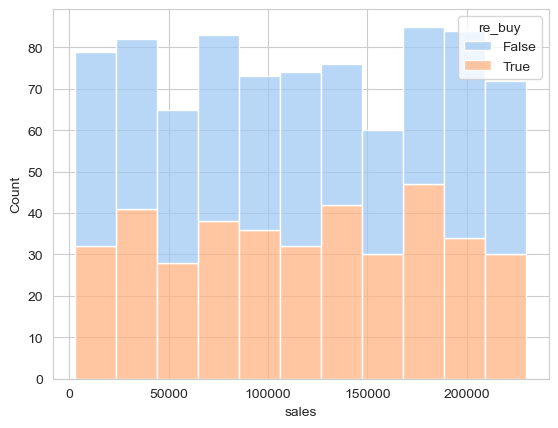

In [363]:
sns.histplot(data=df, x='sales', hue='re_buy', multiple='stack')

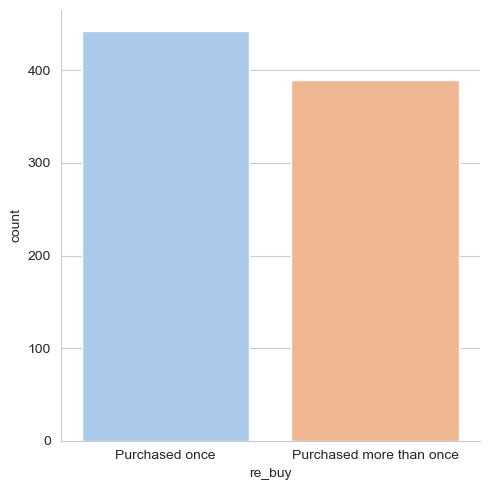

In [364]:
sns.set_style("whitegrid")
sns.set_palette('pastel')
g = sns.catplot(x="re_buy", data=df, kind="count")
g.set_xticklabels(["Purchased once", "Purchased more than once"])
plt.show()

# Do the products being purchased again have better sales than others?

In [365]:
df.groupby('re_buy')['sales'].agg(['sum', 'mean','std','median'])

,sum,mean,std,median
re_buy,,,,
False,51125000,115406.320542,67746.080054,116000.0
True,45587000,116889.743590,64750.266924,117500.0


In [366]:
df.groupby('re_buy')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
re_buy,,,,,,,,
False,443.0,115406.320542,67746.080054,3000.0,57000.0,116000.0,179500.0,230000.0
True,390.0,116889.743590,64750.266924,3000.0,61000.0,117500.0,176750.0,230000.0


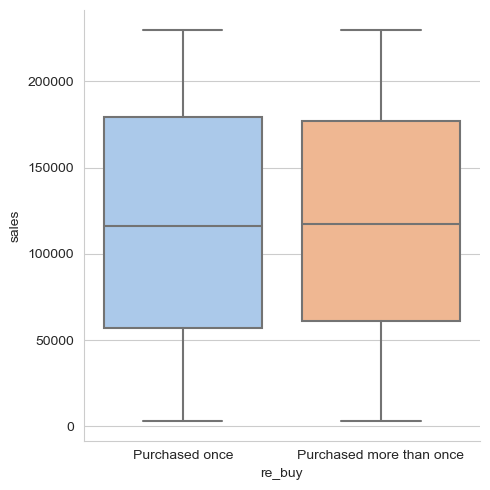

In [367]:
g = sns.catplot(x="re_buy", y="sales", data=df, kind="box")
g.set_xticklabels(["Purchased once", "Purchased more than once"])
plt.show()

# What products are more likely to be purchased again for different types of pets?

In [368]:
#order = ['extra_small','small','medium','large','extra_large']
#g = sns.catplot(x="re_buy", col='pet_type', data=df, kind="count", hue='pet_size', hue_order=order)
# g.set_xticklabels(["Purchased once", "Purchased more than once"])

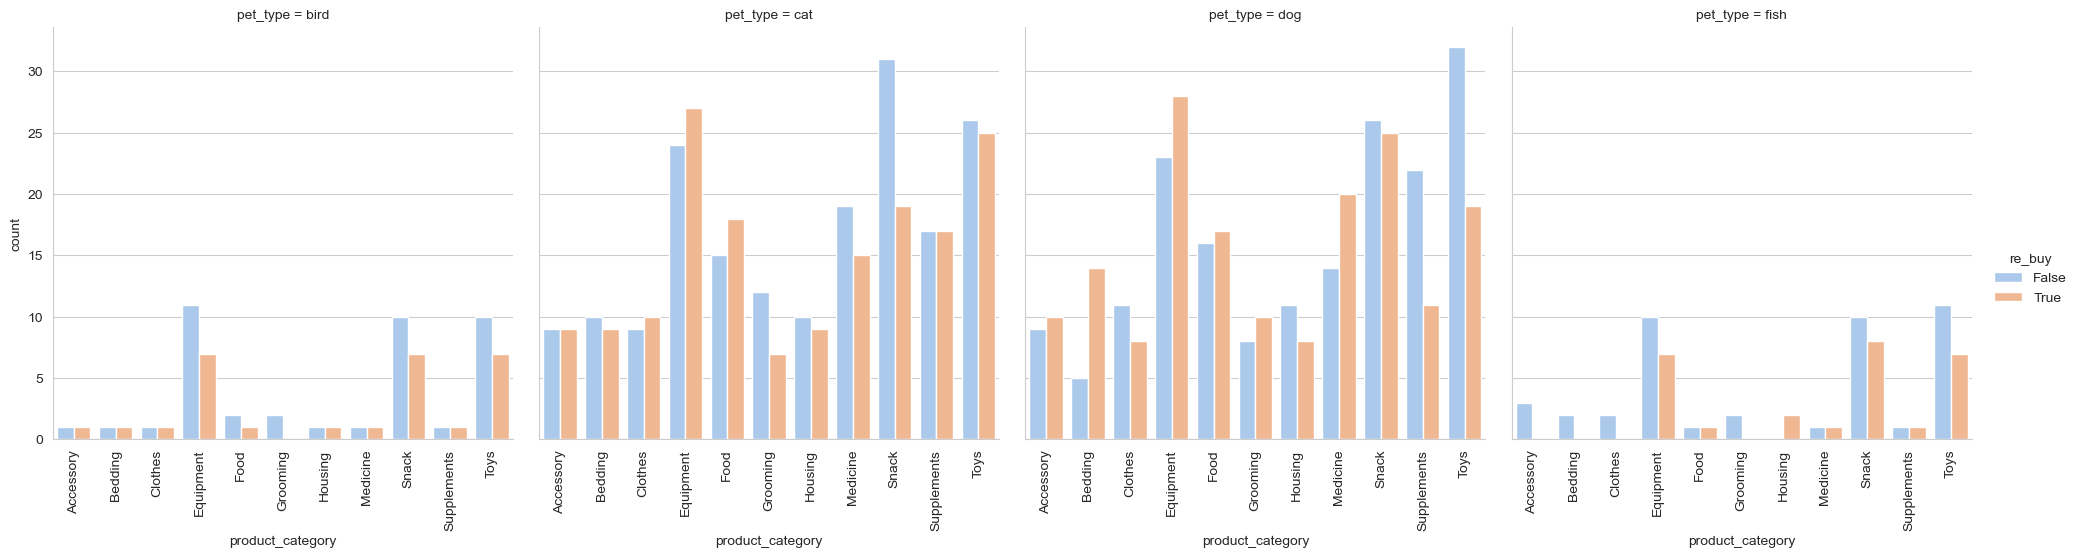

In [369]:
g = sns.catplot(x="product_category", data=df, kind="count", hue='re_buy',col='pet_type')
g.set_xticklabels(rotation=90)
plt.show()

In [370]:
df.groupby(['product_category'])['re_buy'].value_counts(normalize=True)

product_category  re_buy
Accessory         False     0.523810
                  True      0.476190
Bedding           True      0.571429
                  False     0.428571
Clothes           False     0.547619
                  True      0.452381
Equipment         True      0.503650
                  False     0.496350
Food              True      0.521127
                  False     0.478873
Grooming          False     0.585366
                  True      0.414634
Housing           False     0.523810
                  True      0.476190
Medicine          True      0.513889
                  False     0.486111
Snack             False     0.566176
                  True      0.433824
Supplements       False     0.577465
                  True      0.422535
Toys              False     0.576642
                  True      0.423358
Name: re_buy, dtype: float64

In [371]:
# https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
cross_tab_prop = pd.crosstab(index=df['product_category'],columns=df['re_buy'], normalize="index")
cross_tab_prop

re_buy,False,True
product_category,,
Accessory,0.523810,0.476190
Bedding,0.428571,0.571429
Clothes,0.547619,0.452381
Equipment,0.496350,0.503650
Food,0.478873,0.521127
Grooming,0.585366,0.414634
Housing,0.523810,0.476190
Medicine,0.486111,0.513889
Snack,0.566176,0.433824


## 根據不同動物分析產品

In [372]:
df.pet_type.value_counts()

cat     347
dog     347
fish     70
bird     69
Name: pet_type, dtype: int64

In [373]:
df['quantity'] = df['sales']//df.price

In [374]:
cat = df.loc[df['pet_type'].isin(['cat']) & df['re_buy']==True]
dog = df.loc[df['pet_type'].isin(['dog']) & df['re_buy']==True]
bird = df.loc[df['pet_type'].isin(['bird']) & df['re_buy']==True]
fish = df.loc[df['pet_type'].isin(['fish']) & df['re_buy']==True]

In [375]:
# cat['quantity'].sort_values(ascending=False).head(10)
# df.nlargest(3, 'Client')

In [376]:
cat.nlargest(5, 'quantity')

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,quantity
473,4755,Food,157000,2.35,VC_1320,medium,cat,7,True,66808.0
405,4587,Bedding,202000,13.29,VC_1152,small,cat,10,True,15199.0
19,4341,Food,126000,10.92,VC_906,extra_large,cat,5,True,11538.0
470,4583,Food,228000,22.16,VC_1148,medium,cat,10,True,10288.0
432,4797,Equipment,189000,24.10,VC_1362,medium,cat,7,True,7842.0


In [380]:
dog.nlargest(10, 'quantity')

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,quantity
97,4520,Clothes,141000,3.33,VC_1085,extra_small,dog,4,True,42342.0
70,4500,Housing,177000,4.76,VC_1065,extra_small,dog,8,True,37184.0
693,4390,Housing,120000,4.41,VC_955,extra_small,dog,5,True,27210.0
593,4540,Snack,177000,8.97,VC_1105,extra_small,dog,10,True,19732.0
728,4620,Bedding,199000,13.51,VC_1185,extra_small,dog,10,True,14729.0
739,4842,Equipment,199000,14.55,VC_1407,small,dog,1,True,13676.0
413,4860,Equipment,191000,17.46,VC_1425,small,dog,1,True,10939.0
390,4522,Housing,193000,18.12,VC_1087,small,dog,9,True,10651.0
699,4608,Clothes,56000,6.49,VC_1173,medium,dog,10,True,8628.0
72,4482,Grooming,210000,26.68,VC_1047,small,dog,4,True,7871.0


In [378]:
fish.nlargest(5, 'quantity')

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,quantity
553,5030,Toys,133000,8.84,VC_1595,small,fish,6,True,15045.0
24,4271,Medicine,188000,22.01,VC_836,extra_large,fish,4,True,8541.0
199,4217,Supplements,177000,36.11,VC_782,small,fish,6,True,4901.0
575,5014,Snack,111000,28.85,VC_1579,small,fish,6,True,3847.0
226,5032,Snack,132000,67.91,VC_1597,small,fish,6,True,1943.0


In [379]:
bird.nlargest(5, 'quantity')

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,quantity
751,5037,Equipment,157000,0.35,VC_1602,medium,bird,7,True,448571.0
190,4242,Food,142000,14.42,VC_807,small,bird,3,True,9847.0
283,5017,Snack,146000,20.15,VC_1582,medium,bird,6,True,7245.0
543,4200,Equipment,151000,65.79,VC_765,extra_small,bird,1,True,2295.0
346,5035,Snack,198000,94.29,VC_1600,medium,bird,7,True,2099.0
